In [1]:
# Import packages as needed. Maybe PIL?
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import YAArrow

import numpy as np

import textwrap

from astropy.io import ascii, fits
from astropy.io.fits import getdata

In [70]:
def spectraChart():
    
    # set up figure 
    f, axs = plt.subplots(9, sharex = True, figsize=(20,40))
    f.set_facecolor('white')
    f.canvas.set_window_title("Spectra")

    plt.style.use('fivethirtyeight')
    
    axs[-1].set_xlim(0.3,1)
    axs[-1].set_xlabel('Wavelength ($\mu m$)')
    axs[0].set_title("Spectra")
    
    # ordering the plots (0 is the top)
    quasarPlt = 0
    galPlt = 1
    starPlt = 2
    dustPlt = 3
    solPlt = 4
    skyAbsPlt = 5
    skyEmmPlt = 6 
    solAtPlt = 7
    sdssPlt = 8
    
    
    # SDSS filters
    # Doi, M., Tanaka, M., Fukugita, M., Gunn, J. E., Yasuda, N., Ivezić, Ž., ... & Leger, R. F. (2010). Photometric response functions of the sloan digital sky survey imager. The Astronomical Journal, 139(4), 1628.
    sdssGrizy = ascii.read('grizyFilters.txt',format='tab')  
    axs[sdssPlt].set_ylabel("SDSS Filter Response")
    lambdaMicron = sdssGrizy['lambda']*(10**-4)
    axs[sdssPlt].plot(lambdaMicron,sdssGrizy['u'],'#008fd5',label='u')
    axs[sdssPlt].plot(lambdaMicron,sdssGrizy['g'],'#6d904f',label='g')
    axs[sdssPlt].plot(lambdaMicron,sdssGrizy['r'],'#fc4f30',label='r')
    axs[sdssPlt].plot(lambdaMicron,sdssGrizy['i'],'#810f7c',label='i')
    axs[sdssPlt].plot(lambdaMicron,sdssGrizy['z'],'#8b8b8b',label='z')
    axs[sdssPlt].legend()
    
    # Solar spectrum
    # http://www.eso.org/observing/dfo/quality/UVES/pipeline/solar_spectrum.html
    #fitsData = fits.open("solar_spectrum.fits")
    #solarSpec = fitsData[0].data
    #fitsData.close()
    #solPlt = 2
    
    #axs[solPlt].set_ylabel("UVES solar spectrum (flux)")
    #axs[solPlt].set_ylim([0,1.5])
    
    #xvals = np.zeros(len(solarSpec[1000:]))
    #xvals[0] = 3000
    #for i in range(1,len(xvals)):
    #    xvals[i] = xvals[i-1] + 0.0124862
    #axs[solPlt].plot(xvals*(10**-4),solarSpec[1000:],'#e5ae38')
    
    # Sky Spectra
    axs[skyEmmPlt].set_ylabel("Sky Emission")
    skyEmmTab = ascii.read('sky_emission.txt')
    skyEmm = skyEmmTab[(skyEmmTab['nm'] >= 300) & (skyEmmTab['nm'] <= 1000)]
    axs[skyEmmPlt].plot(skyEmm['nm']*(10**-3),skyEmm['phot/s/nm/arcsec^2/m^2'],'#810f7c') 
    
    axs[skyAbsPlt].set_ylabel("Sky Transparency")
    #axs[skyAbsPlt].set_yscale("log")
    skyAbsorbTab = ascii.read('sky_transparency.txt',header_start=4,data_start=6,delimiter=' ')
    skyAbsorb = skyAbsorbTab[(skyAbsorbTab['lam(A)'] >= 3000) & (skyAbsorbTab['lam(A)'] <= 10000)]
    axs[skyAbsPlt].plot(skyAbsorb['lam(A)']*(10**-4),skyAbsorb['E1.0(mag)'],color='#6d904f',label="E1.0(mag)")
    #axs[skyAbsPlt].plot(skyAbsorb['lam(A)']*(10**-4),skyAbsorb['E2.0(mag)'],color='#008fd5',label="E2.0(mag)")
    axs[skyAbsPlt].legend(loc='best')
    
    # Interstellar Dust
    # Y-Axis in magnitude units. Spectral range in Optical.
    dust_spec = ascii.read('IS_dust.txt',header_start=0,data_start=3,delimiter=' ')
    axs[dustPlt].set_ylabel("Dust extinction ($C_{ext}/H$)")
    dust = dust_spec[(dust_spec['lambda'] >= 0.3) & (dust_spec['lambda'] <= 1)]
    axs[dustPlt].plot(dust['lambda'], dust['C_ext/H'],color='#4f4f4f',label='ISM Dust')
    axs[dustPlt].legend(loc='best')
    
    # Galaxy Spectrum
    # Y-Axis in magnitude units. Spectral range in Optical.
    ell_spec = ascii.read('elliptical_template.ascii')
    bulge_spec = ascii.read('bulge_template.ascii')
    sa_spec = ascii.read('sa_template.ascii')
    
    axs[galPlt].set_ylabel("Galaxy Emission (Flux)")
    lambdaGalE = ell_spec['col1']*(10**-4)
    lambdaGalB = bulge_spec['col1']*(10**-4)
    lambdaGalS = sa_spec['col1']*(10**-4)
    axs[galPlt].plot(lambdaGalE,ell_spec['col2'],'#008fd5',label='Elliptical')
    axs[galPlt].plot(lambdaGalB,bulge_spec['col2'],'#6d904f',label='Bulge')
    axs[galPlt].plot(lambdaGalS,sa_spec['col2'],'#fc4f30',label='Spiral')
    axs[galPlt].legend(loc='best')
       
    # Stelar spectra
    axs[starPlt].set_ylabel("Stelar Emission (Flux)")
    k0Tab = ascii.read('m0138V_HD025673_K0.txt')
    f5Tab = ascii.read('m0328V_HD076910_F5.txt')
    b9Tab = ascii.read('m0430V_HD105262_B9.txt')
    k0 = k0Tab[(k0Tab['col1'] >= 3000) & (k0Tab['col1'] <= 10000)]
    b9 = f5Tab[(f5Tab['col1'] >= 3000) & (f5Tab['col1'] <= 10000)]
    f5 = b9Tab[(b9Tab['col1'] >= 3000) & (b9Tab['col1'] <= 10000)]
    axs[starPlt].plot(k0['col1']*10**-4,k0['col2'],'#fc4f30',label='Type K0')
    axs[starPlt].plot(b9['col1']*10**-4,b9['col2'],'#008fd5',label='Type B9')
    axs[starPlt].plot(f5['col1']*10**-4,f5['col2'],'#6d904f',label='Type F5')
    axs[starPlt].legend(loc='best')
    
    # Quasar Spectra
    axs[quasarPlt].set_ylabel("Quasar Emission (Flux)")
    quasarTab = ascii.read('quasar.txt')
    quasar = quasarTab[(quasarTab['Wave'] >= 3000) & (quasarTab['Wave'] <= 10000)]
    axs[quasarPlt].plot(k0['col1']*10**-4,k0['col2'],'#e5ae38',label="Mean Composite Quasar Spectrum")
    axs[quasarPlt].legend(loc='best')
    
    
    # Solar Spectra
    axs[solAtPlt].set_ylabel("Solar Emission (Atmosphere)")
    solarAtmosTab = ascii.read('ASTMG173.csv',header_start=1,data_start=2)
    solarAtmos = solarAtmosTab[(solarAtmosTab['Wvlgth nm'] >= 300) & (solarAtmosTab['Wvlgth nm'] <= 1000)]
    axs[solAtPlt].plot(solarAtmos['Wvlgth nm']*10**-3,solarAtmos['Etr W*m-2*nm-1'],'#e5ae38',label="Solar Spectrum Through Atmosphere")
    axs[solAtPlt].legend(loc='best')
    
    axs[solPlt].set_ylabel("Solar Emission (No Atmosphere)")
    solarTab = ascii.read('wehrli85.txt')
    solar = solarTab[(solarTab['nm'] >= 300) & (solarTab['nm'] <= 1000)]
    axs[solPlt].plot(solar['nm']*10**-3,solar['W/sm/nm'],'#e5ae38',label="1985 Wehrli Standard Extraterrestrial Solar Irradiance Spectrum")
    axs[solPlt].legend(loc='best')
    
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
    plt.tight_layout()    
    plt.savefig('spectra.pdf')
    plt.show()

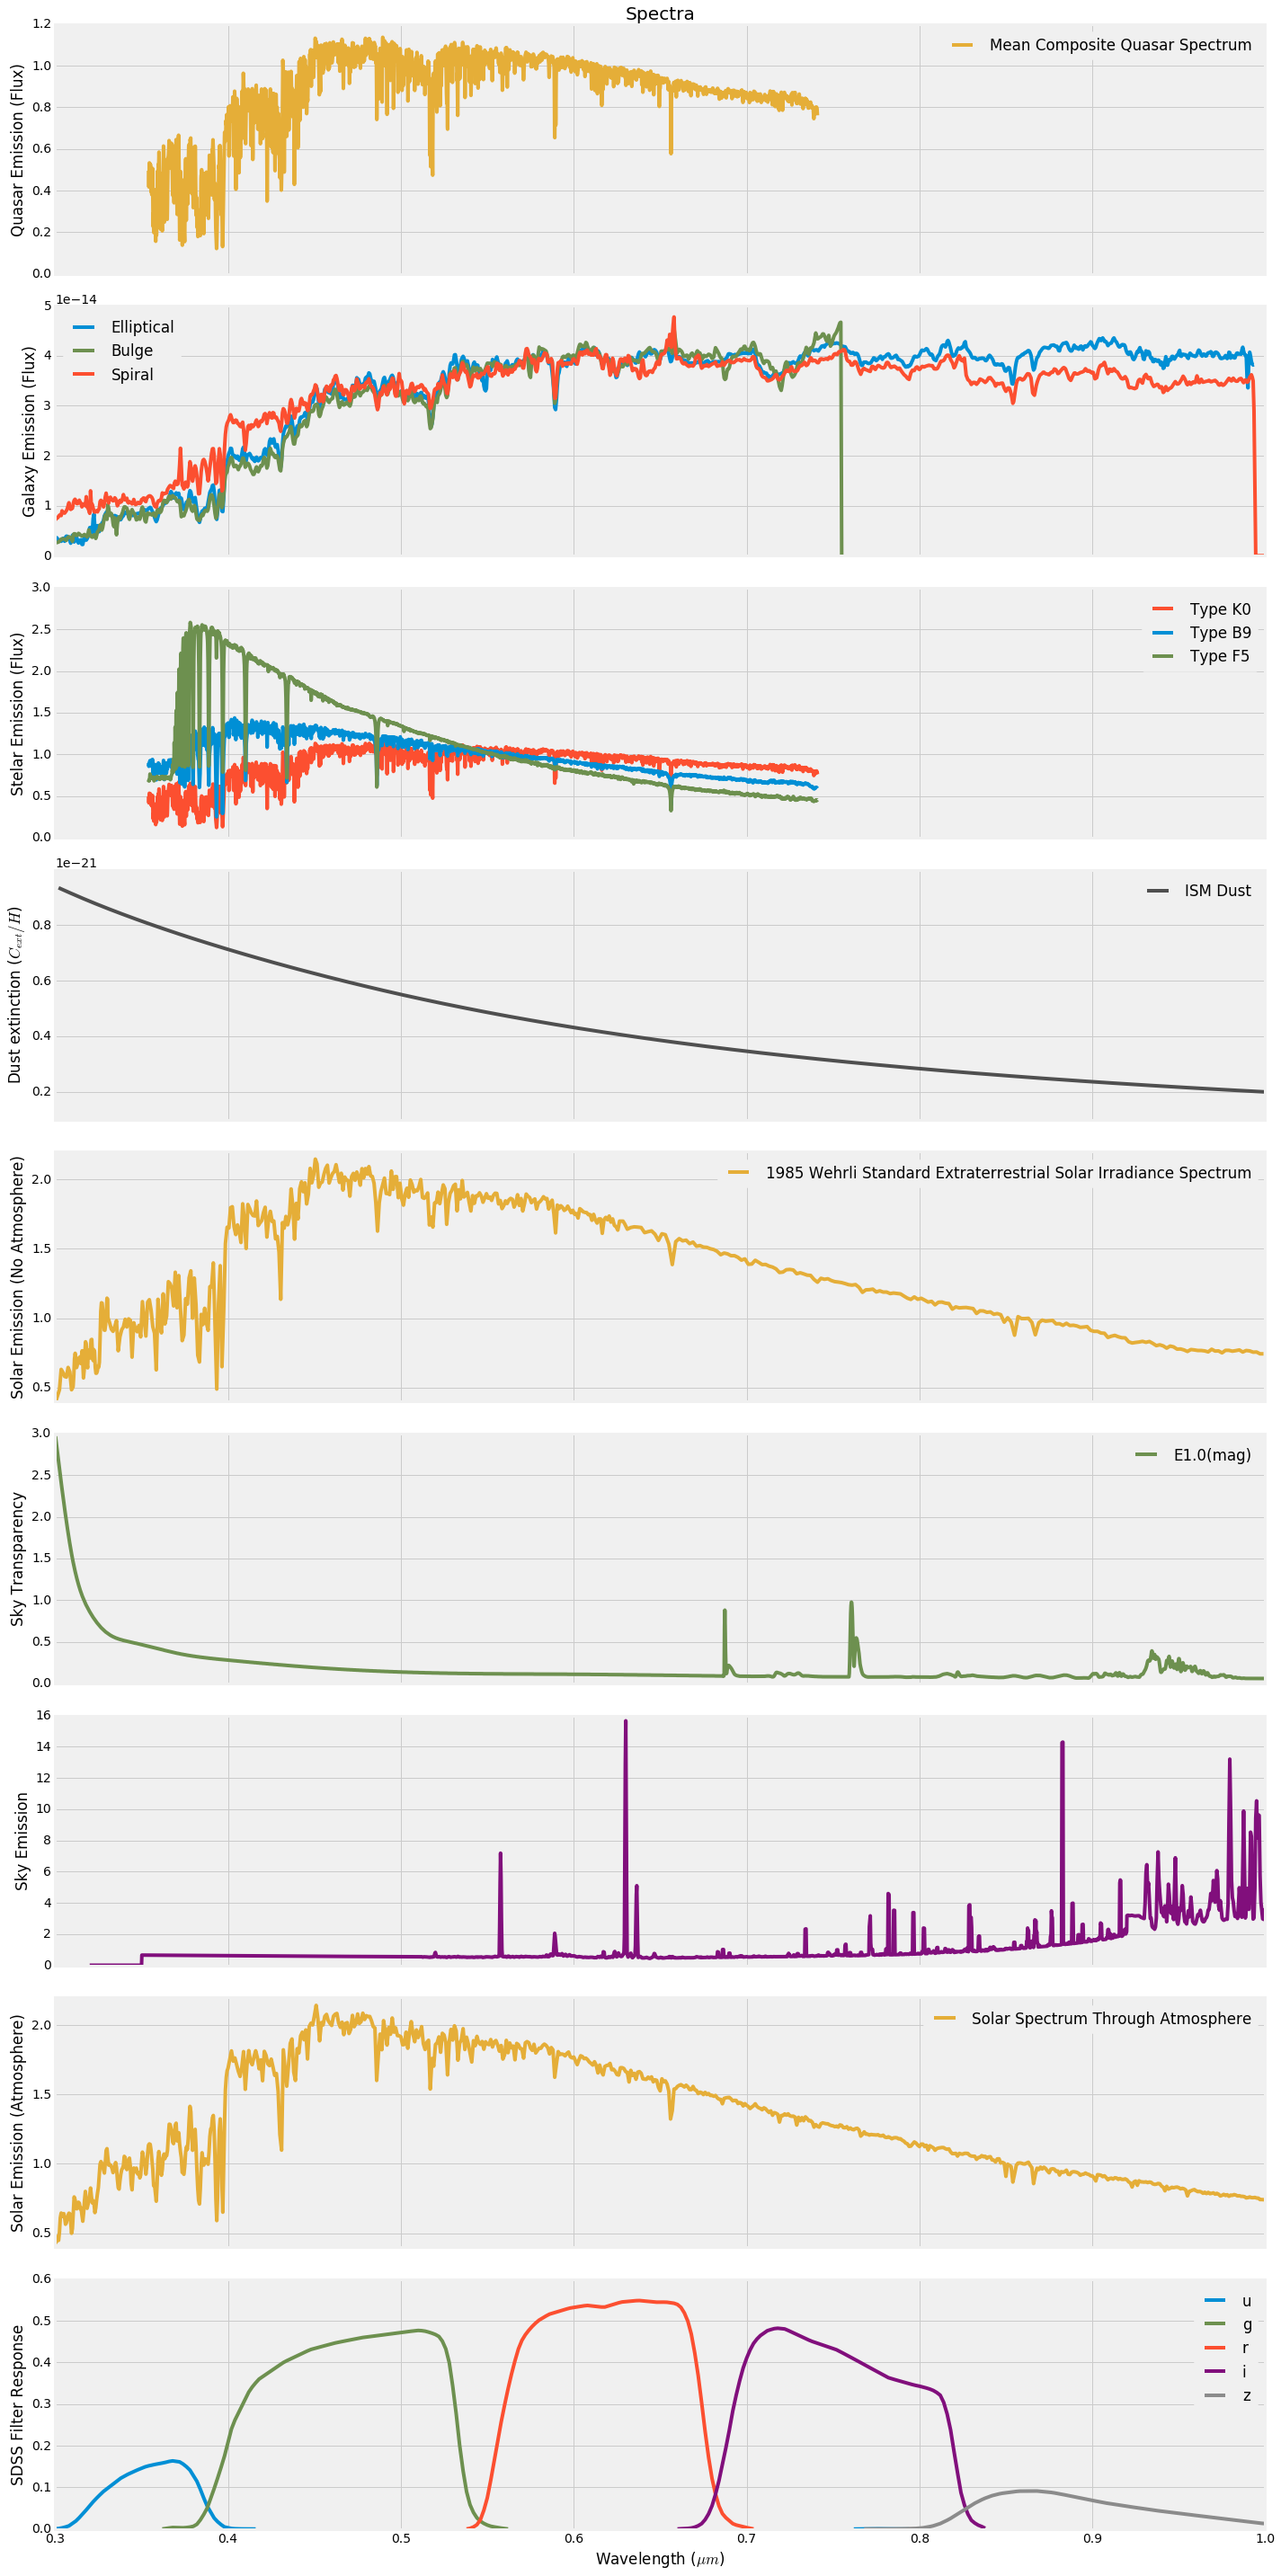

In [71]:
spectraChart()